Generation 1
-----
Individual 1: [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
Individual 2: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
Individual 3: [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
Individual 4: [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
Individual 5: [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
Individual 6: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
Individual 7: [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]
Individual 8: [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
Individual 9: [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
Individual 10: [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
All fitness values: [59, 55, 53, 39, 0, 0, 0, 0, 0, 0]
-----
Best solution(s):
Best Individual: [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
Fitness Score: 59



Generation 2
-----
Individual 1: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]
Individual 2: [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
Individual 3: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
Individual 4: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
Ind

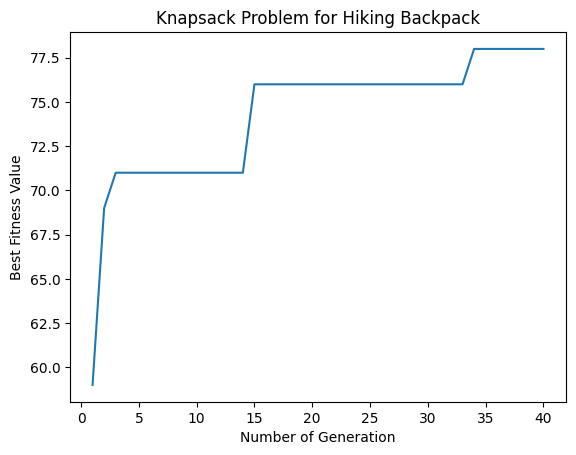

In [1]:
import random
import matplotlib.pyplot as plt
import pickle

# 1. Define the Items List
items = [
    {"name": "Hiking Boots", "weight": 2, "value": 10},
    {"name": "Sleeping Bag", "weight": 4, "value": 13},
    {"name": "Water Bottle", "weight": 3, "value": 5},
    {"name": "Food Pack", "weight": 7, "value": 20},
    {"name": "Jacket", "weight": 5, "value": 14},
    {"name": "First Aid Kit", "weight": 3, "value": 7},
    {"name": "Compass", "weight": 1, "value": 3},
    {"name": "Map", "weight": 2, "value": 12},
    {"name": "Flashlight", "weight": 6, "value": 18},
    {"name": "Sunglasses", "weight": 2, "value": 8},
    {"name": "Energy Bars", "weight": 2, "value": 15},
    {"name": "Multi-Tool", "weight": 4, "value": 10},
    {"name": "Rain Poncho", "weight": 1, "value": 5},
    {"name": "Camping Stove", "weight": 8, "value": 20}
]

# GA parameters
num_items = len(items)
bag_capacity = 20
population_size = 10
num_generations = 40
crossover_rate = 0.8
mutation_rate = 0.2

# 2. Update GA Functions

# Assign population using random number
def initialize_population():
    return [[random.choice([0, 1]) for _ in range(num_items)] for _ in range(population_size)]

# Calculate fitness value for hiking bag problem
def calculate_fitness(individual):
    total_value = sum(item["value"] * item_selected for item, item_selected in zip(items, individual))
    total_weight = sum(item["weight"] * item_selected for item, item_selected in zip(items, individual))

    # Penalize solutions that exceed the bag capacity
    if total_weight > bag_capacity:
        return 0
    else:
        return total_value

# Rank-based selection
def rank_based_selection(fitness_scores):
    rank_scores = [score for score, _ in sorted(enumerate(fitness_scores), key=lambda x: x[1], reverse=True)]
    total_rank = sum(range(1, population_size + 1))
    probabilities = [rank / total_rank for rank in range(1, population_size + 1)]
    selected_parents = random.choices(range(population_size), weights=probabilities, k=population_size // 2)
    return selected_parents, population_size // 2

def enforce_weight_constraint(individual):
    total_weight = sum(item["weight"] * item_selected for item, item_selected in zip(items, individual))
    if total_weight > bag_capacity:
        while total_weight > bag_capacity:
            mutation_point = random.randint(0, num_items - 1)
            if individual[mutation_point] == 1:
                individual[mutation_point] = 0
                total_weight -= items[mutation_point]["weight"]
    return individual

# One-point Crossover
def one_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, num_items - 1)
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

    offspring1 = enforce_weight_constraint(offspring1)
    offspring2 = enforce_weight_constraint(offspring2)

    return offspring1, offspring2

# Bit-Flip Mutation
def bit_flip_mutation(individual):
    mutated_individual = individual.copy()
    mutation_point = random.randint(0, num_items - 1)
    mutated_individual[mutation_point] = 1 - mutated_individual[mutation_point]

    mutated_individual = enforce_weight_constraint(mutated_individual)

    return mutated_individual

# Elitism replacement
def elitism_replacement(population, offspring):
    combined_population = population + offspring
    fitness = [calculate_fitness(individual) for individual in combined_population]
    best_indices = sorted(range(len(fitness)), key=lambda k: fitness[k], reverse=True)[:population_size]
    population = [combined_population[i] for i in best_indices]
    return population

# Lists to store best fitness and best individual for each generation
best_fitness_list = []
best_individual_list = []

# Initialize population
population = initialize_population()

# Main loop for genetic algorithm
for generation in range(num_generations):
    fitness_scores = [calculate_fitness(individual) for individual in population]
    parents, num_parents = rank_based_selection(fitness_scores)

    offspring = []
    for parent1, parent2 in zip(parents[::2], parents[1::2]):
        child1, child2 = one_point_crossover(population[parent1], population[parent2])
        offspring.extend([child1, child2])

    offspring = [bit_flip_mutation(individual) for individual in offspring]
    population = elitism_replacement(population, offspring)
    fitness_scores = [calculate_fitness(individual) for individual in population]

    best_fitness = max(fitness_scores)
    best_indices = [i for i, fitness in enumerate(fitness_scores) if fitness == best_fitness]
    best_individuals = [population[index] for index in best_indices]

    best_fitness_list.append(best_fitness)
    best_individual_list.append(best_individuals)

    print("Generation", generation + 1)
    print("-----")
    for i, individual in enumerate(population):
        print(f"Individual {i + 1}: {individual}")
    print("All fitness values:", fitness_scores)
    print("-----")
    print("Best solution(s):")
    for index, individual in zip(best_indices, best_individuals):
        print("Best Individual:", individual)
        print("Fitness Score:", best_fitness)
        print()
    print("\n")

# Find the highest fitness value
max_fitness = max(best_fitness_list)

# Save the model after GA execution
model_data = {
    "best_individual": best_individual_list[-1],
    "best_fitness": best_fitness_list[-1],
    "items": items,
    "population_size": population_size,
    "num_generations": num_generations,
    "crossover_rate": crossover_rate,
    "mutation_rate": mutation_rate,
    "bag_capacity": bag_capacity,
}

with open('ga_knapsack_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

# Display the best individual(s) and fitness value from all the generations
print("Best individual(s) with the highest fitness value:")
for index in best_indices:
    generation = index + 1
    best_individuals = best_individual_list[index]
    print("Generation:", generation)
    for i, individual in enumerate(best_individuals):
        print("Best Individual:", individual)
        print("Fitness Score:", max_fitness)
        print()

# Plot a graph of the fitness over generations
plt.plot(range(1, num_generations + 1), best_fitness_list)
plt.xlabel("Number of Generation")
plt.ylabel("Best Fitness Value")
plt.title('Knapsack Problem for Hiking Backpack')
plt.show()
